In [3]:
import pandas as pd

# Loading the dataset
file_path = "GlobalWeatherRepository.csv" 
df = pd.read_csv(file_path)

In [5]:
# Printing dataset information
print("\n Displaying basic information about the dataset:\n")
df.info()

# Printing first few rows
print("\n Displaying the first 5 rows of the dataset:\n")
print(df.head())

# Printing dataset size
print("\n The dataset contains", df.shape[0], "rows and", df.shape[1], "columns.\n")

# Printing column names
print("\n Column names in the dataset:\n", df.columns.tolist(), "\n")

# Printing data types of columns
print("\n Data types of each column:\n")
print(df.dtypes)

# Checking missing values
print("\n Checking for missing values in the dataset:\n")
print(df.isnull().sum())

# Checking for duplicate rows
print("\n Number of duplicate rows in the dataset:", df.duplicated().sum(), "\n")



 Displaying basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56906 entries, 0 to 56905
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       56906 non-null  object 
 1   location_name                 56906 non-null  object 
 2   latitude                      56906 non-null  float64
 3   longitude                     56906 non-null  float64
 4   timezone                      56906 non-null  object 
 5   last_updated_epoch            56906 non-null  int64  
 6   last_updated                  56906 non-null  object 
 7   temperature_celsius           56906 non-null  float64
 8   temperature_fahrenheit        56906 non-null  float64
 9   condition_text                56906 non-null  object 
 10  wind_mph                      56906 non-null  float64
 11  wind_kph                      56906 non-null  float64
 12  wind_degr

#### **Analysis from the above output**

The dataset consists of **56,906 rows** and **41 columns**, containing **daily weather data** for various global locations. It includes a variety of meteorological and environmental parameters:

- **Temperature, Wind Speed, Pressure, Precipitation, Humidity, and Air Quality**
- **Astronomical Data** such as **sunrise, sunset, and moon phase**

#### **Data Structure**
- The dataset is **well-structured** with appropriate **data types**:
  - **Numerical features**: Stored as float or int64
  - **Categorical attributes**: Stored as object (e.g., weather conditions, wind direction)
  - **Timestamp column (last_updated)**: Currently in object format and needs conversion for **time series analysis**
- **No missing values** or **duplicate rows**, meaning **minimal preprocessing** is required.

#### **Data Cleaning & Preprocessing**
- **Redundant Columns**: Some features are duplicated in different units:
  - **Temperature** (Celsius & Fahrenheit)
  - **Wind Speed** (mph & kph)
  - These will be **dropped** to **avoid duplication**.
- **Categorical Feature Consistency**:
  - Weather condition descriptions and **wind direction** need to be checked for **uniformity**.

In [8]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
print("Converted 'last_updated' to datetime format.")

Converted 'last_updated' to datetime format.


#### **Data Cleaning: Removing Redundant Columns**

To eliminate **duplicate information** and ensure **consistency** in the dataset, we removed **redundant columns** that provided the same data in different units. The following columns were dropped:

- **Temperature**: temperature_fahrenheit (retained temperature_celsius)
- **Pressure**: pressure_in (retained pressure_mb)
- **Precipitation**: precip_in (retained precip_mm)
- **Feels Like Temperature**: feels_like_fahrenheit (retained feels_like_celsius)
- **Visibility**: visibility_miles (retained visibility_km)
- **Wind Gust**: gust_mph (retained gust_kph)

#### **Reasons for Removing These Columns**
- **Ensured uniformity** by keeping only **metric units**.
- **Reduced memory usage**, making the dataset more efficient.
- **Prevented confusion** during analysis by maintaining **a single unit system**.

This step optimizes the dataset, making it **cleaner** and **more efficient** for **exploratory data analysis (EDA) and forecasting models**.

In [11]:
# List of columns to drop (only the ones that exist)
columns_to_drop = ['temperature_fahrenheit', 'pressure_in', 'precip_in', 
                   'feels_like_fahrenheit', 'visibility_miles', 'gust_mph']

# Drop only existing columns to avoid KeyError
df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped redundant columns: {columns_to_drop}\n")


Dropped redundant columns: ['temperature_fahrenheit', 'pressure_in', 'precip_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_mph']



In [13]:
# Sort dataset by datetime column
df = df.sort_values(by='last_updated')
print("Sorted dataset by 'last_updated'.")

Sorted dataset by 'last_updated'.


In [15]:
# Check unique values in categorical columns
print("Unique values in 'condition_text':\n", df['condition_text'].unique())
print("Unique values in 'wind_direction':\n", df['wind_direction'].unique())
print("Unique values in 'moon_phase':\n", df['moon_phase'].unique())


Unique values in 'condition_text':
 ['Clear' 'Fog' 'Overcast' 'Moderate or heavy rain with thunder'
 'Patchy rain nearby' 'Mist' 'Partly cloudy' 'Partly Cloudy' 'Sunny'
 'Moderate or heavy rain shower' 'Light rain' 'Moderate rain'
 'Light drizzle' 'Thundery outbreaks in nearby'
 'Patchy light rain in area with thunder' 'Patchy light rain with thunder'
 'Moderate rain at times' 'Light rain shower' 'Cloudy'
 'Heavy rain at times' 'Patchy light rain' 'Patchy light drizzle'
 'Thundery outbreaks possible' 'Patchy rain possible'
 'Moderate or heavy rain in area with thunder' 'Heavy rain'
 'Torrential rain shower' 'Freezing fog' 'Moderate or heavy snow showers'
 'Light sleet' 'Blizzard' 'Moderate snow' 'Light snow'
 'Light sleet showers' 'Light freezing rain' 'Heavy snow' 'Blowing snow'
 'Patchy heavy snow' 'Light snow showers' 'Moderate or heavy sleet'
 'Patchy light snow' 'Patchy moderate snow' 'Freezing drizzle'
 'Moderate or heavy snow in area with thunder' 'Patchy snow nearby'
 'Patchy s

#### **After Analyzing the Above Output**  

After reviewing the **unique values** in the categorical data, we identified minor inconsistencies in the `condition_text` (weather conditions) column. Some variations, such as **"Partly cloudy" vs. "Partly Cloudy"** and **"Patchy rain nearby" vs. "Patchy rain possible"**, indicate slight formatting differences or similar meanings. To ensure uniformity, we will **convert all weather condition values to lowercase**. The `wind_direction` column was found to be **consistent**, with all values using standardized **uppercase abbreviations** (e.g., N, NE, NW). Similarly, the `moon_phase` column had **no formatting issues**, with all values correctly structured. These steps help **maintain data integrity** and ensure **cleaner categorical data** for further analysis.


In [18]:
# Standardize weather condition text to lowercase
df['condition_text'] = df['condition_text'].str.lower()
print("Standardized 'condition_text' to lowercase for consistency.")

Standardized 'condition_text' to lowercase for consistency.


In [20]:
print(df['condition_text'].unique())

['clear' 'fog' 'overcast' 'moderate or heavy rain with thunder'
 'patchy rain nearby' 'mist' 'partly cloudy' 'sunny'
 'moderate or heavy rain shower' 'light rain' 'moderate rain'
 'light drizzle' 'thundery outbreaks in nearby'
 'patchy light rain in area with thunder' 'patchy light rain with thunder'
 'moderate rain at times' 'light rain shower' 'cloudy'
 'heavy rain at times' 'patchy light rain' 'patchy light drizzle'
 'thundery outbreaks possible' 'patchy rain possible'
 'moderate or heavy rain in area with thunder' 'heavy rain'
 'torrential rain shower' 'freezing fog' 'moderate or heavy snow showers'
 'light sleet' 'blizzard' 'moderate snow' 'light snow'
 'light sleet showers' 'light freezing rain' 'heavy snow' 'blowing snow'
 'patchy heavy snow' 'light snow showers' 'moderate or heavy sleet'
 'patchy light snow' 'patchy moderate snow' 'freezing drizzle'
 'moderate or heavy snow in area with thunder' 'patchy snow nearby'
 'patchy snow possible' 'patchy light snow in area with thunde

#### **Explanation of Data Cleaning & Preprocessing**  

We performed several **data cleaning steps** to prepare the dataset for analysis:  

- **Converted** last_updated to **datetime** to enable **time-series analysis**.  
- **Dropped redundant columns** that had duplicate information (e.g., **temperature in both Celsius & Fahrenheit**).  
- **Sorted the dataset** by last_updated to ensure **chronological order**.  
- **Standardized** condition_text to **lowercase** to eliminate **inconsistencies** in weather condition labels.  

These steps ensure that the dataset is **clean, consistent, and optimized for analysis**. Now, we are ready to move to the **Exploratory Data Analysis (EDA) phase**!  


#### EDA

In [24]:
print(df.describe())

           latitude     longitude  last_updated_epoch  \
count  56906.000000  56906.000000        5.690600e+04   
mean      19.136988     22.187380        1.728530e+09   
min      -41.300000   -175.200000        1.715849e+09   
25%        3.750000     -6.836100        1.722255e+09   
50%       17.250000     23.320000        1.728554e+09   
75%       40.400000     50.580000        1.734862e+09   
max       64.150000    179.220000        1.741169e+09   
std       24.477303     65.808904        7.355847e+06   

                        last_updated  temperature_celsius      wind_mph  \
count                          56906         56906.000000  56906.000000   
mean   2024-10-10 05:31:21.892946176            22.278399      8.289013   
min              2024-05-16 01:45:00           -24.900000      2.200000   
25%              2024-07-29 15:15:00            17.100000      4.000000   
50%              2024-10-10 12:45:00            25.100000      6.900000   
75%              2024-12-22 15:45:00

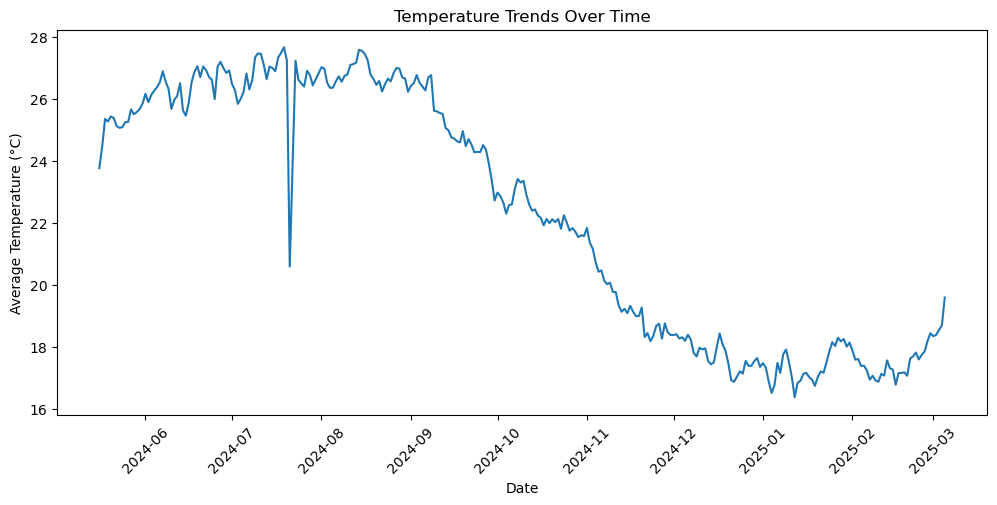

In [26]:
import matplotlib.pyplot as plt

# Plot temperature trends
plt.figure(figsize=(12, 5))
df.groupby(df['last_updated'].dt.date)['temperature_celsius'].mean().plot()
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.xticks(rotation=45)
plt.show()


#### Analysis of the Temperature Trend Plot  

The temperature trend over time exhibits **seasonal variations** with a **clear decline followed by an upward movement**. Initially, **temperature is high around mid-2024**, reaching a **peak** before **gradually decreasing** towards early 2025. By **March 2025**, the temperature **rises again**, suggesting a **seasonal cycle**.  

A **notable anomaly** is observed around **July-August 2024**, where there is a **sharp drop in temperature**. This sudden decrease could be due to **data errors** or an **extreme weather event**. Overall, there is a **general downward trend from mid-2024 to early 2025**, likely reflecting the **transition from summer to winter** in various global locations.  

#### Next Steps: Detecting and Handling Anomalies  
Since we have noticed a **sudden drop in temperature**, it is important to **detect and investigate anomalies before making forecasts**.  

- **Identify Sudden Drops in Temperature**: We will analyze **outliers in temperature data** using **Z-score analysis** to detect and handle anomalies effectively.


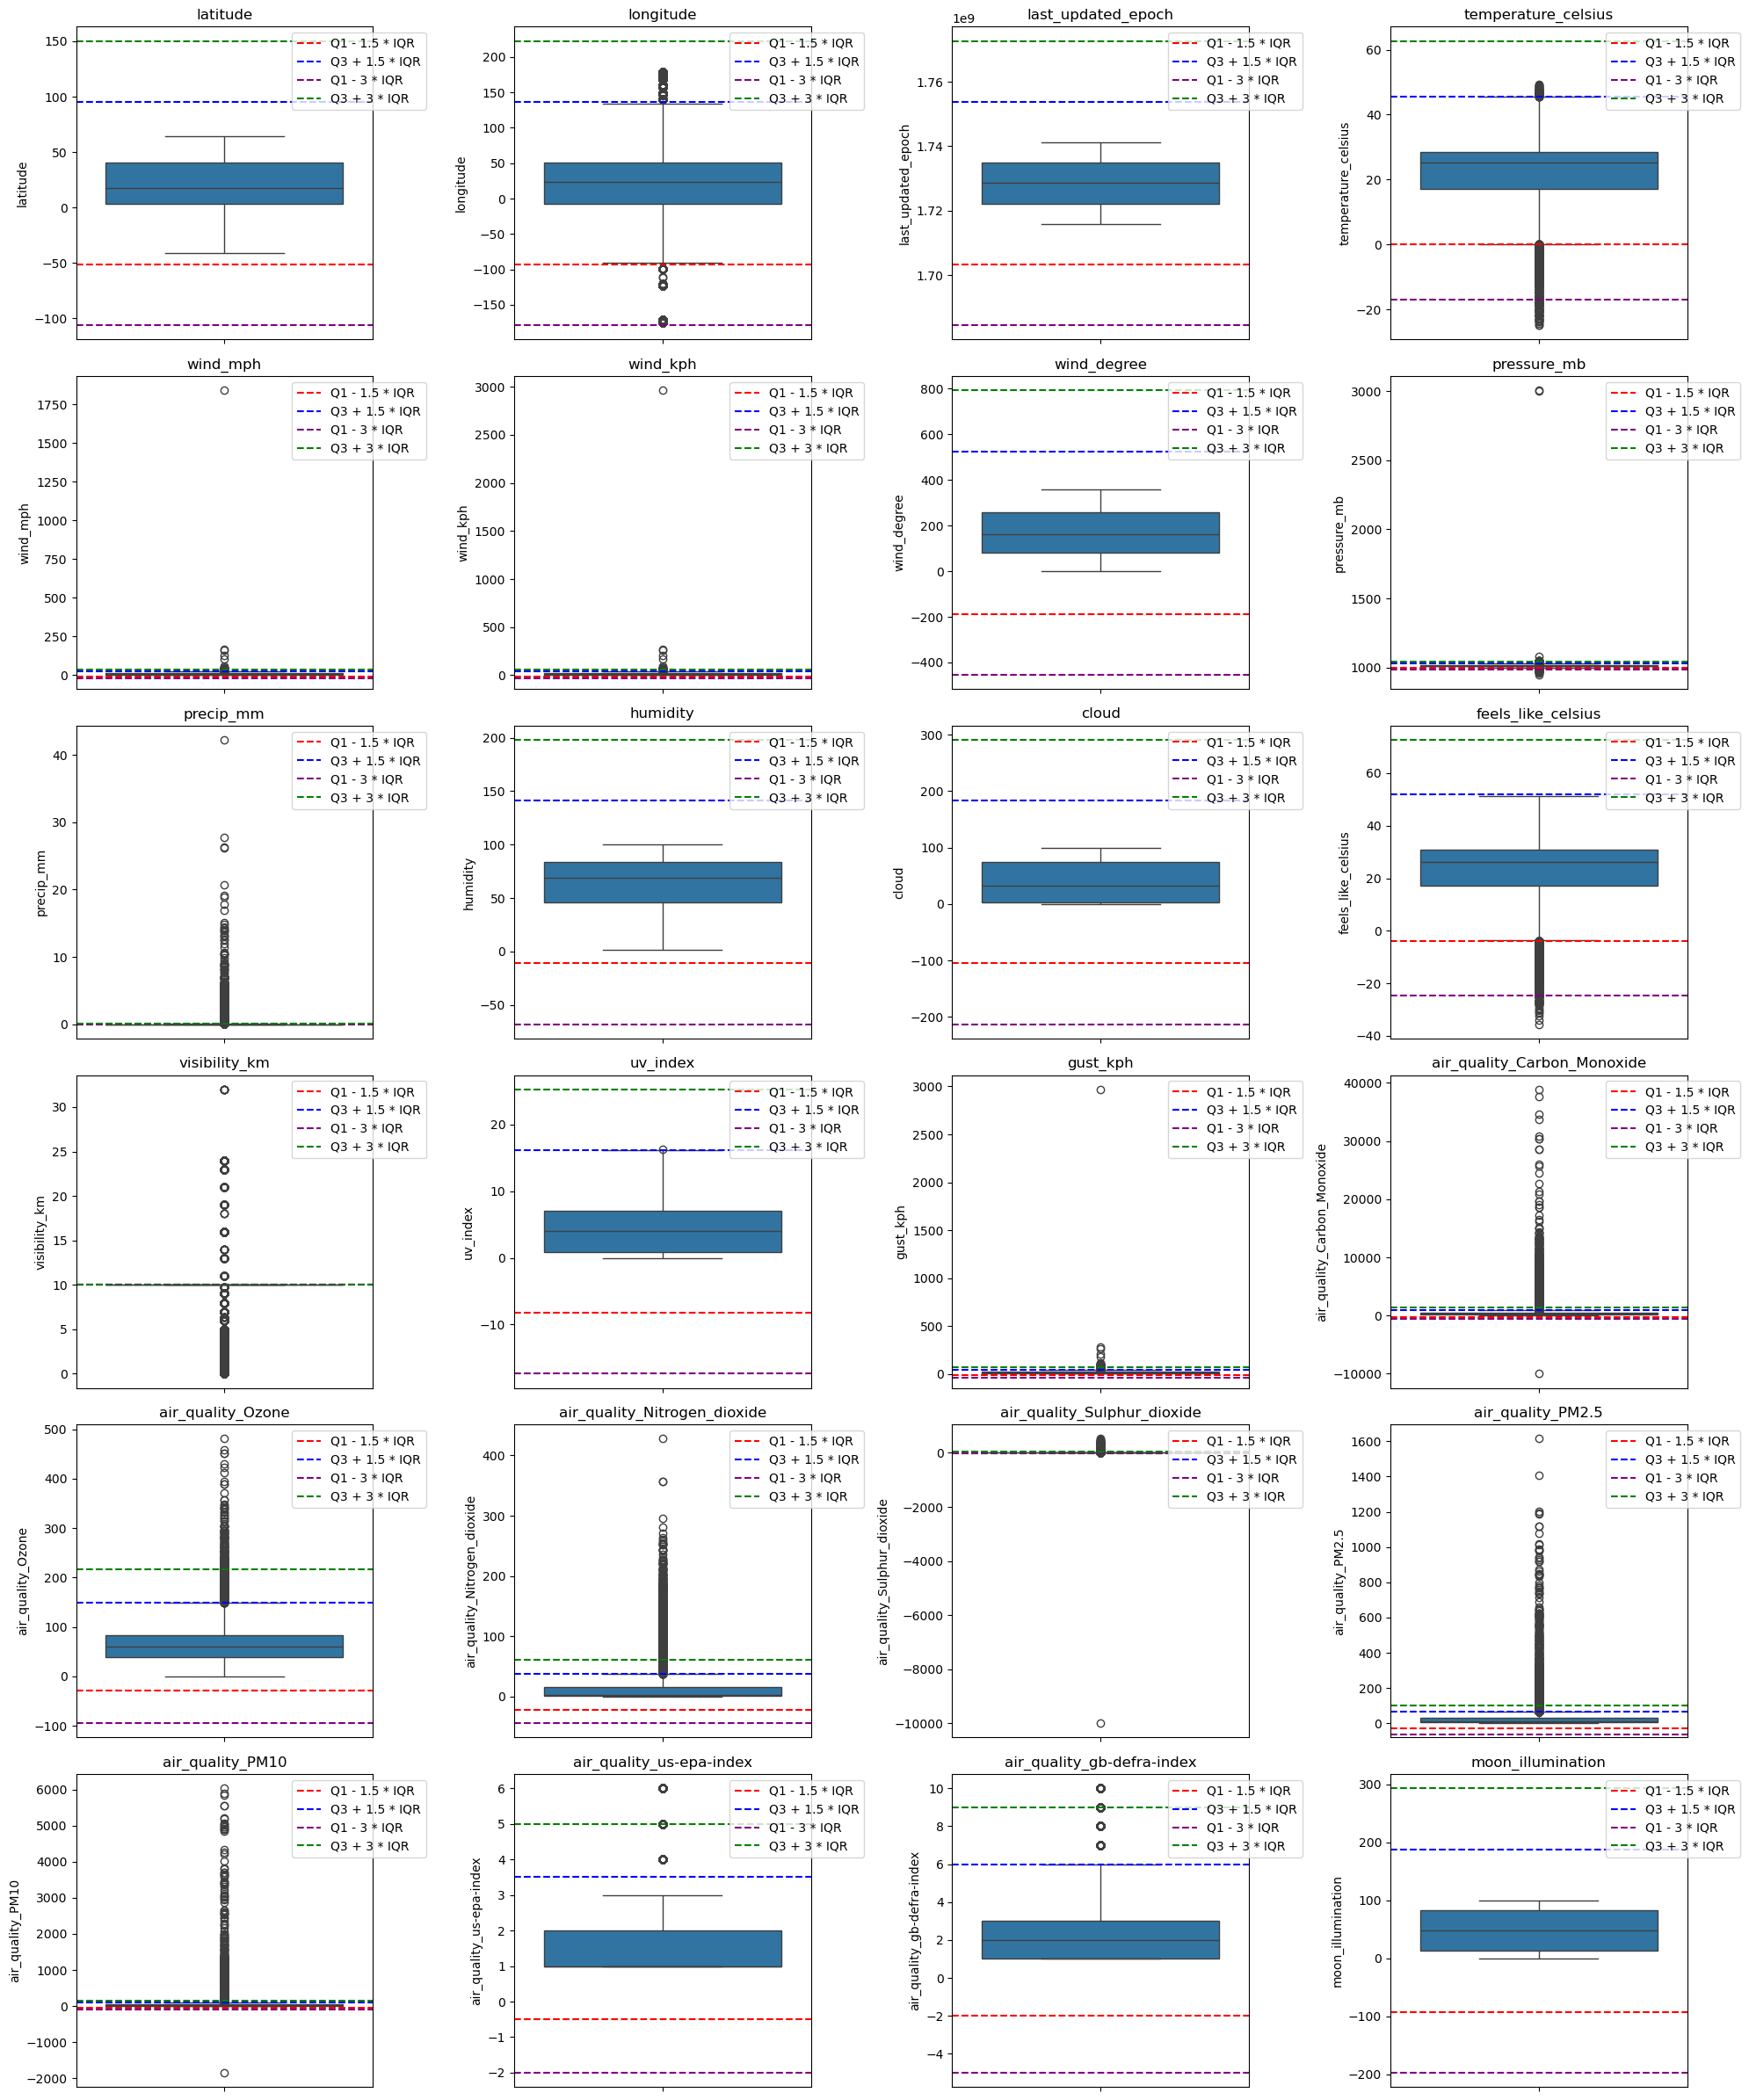


 Extreme Outliers Detected:
              last_updated  temperature_celsius
186   2024-05-16 01:45:00                 16.1
40    2024-05-16 02:45:00                 21.0
52    2024-05-16 02:45:00                 26.0
68    2024-05-16 02:45:00                 20.0
74    2024-05-16 02:45:00                 23.0
...                   ...                  ...
56846 2025-03-05 19:45:00                 26.4
56822 2025-03-05 20:45:00                 29.2
56870 2025-03-05 21:00:00                 27.3
56892 2025-03-05 22:00:00                 28.1
56834 2025-03-05 22:45:00                 14.0

[23450 rows x 2 columns]


,last_updated,temperature_celsius,humidity,wind_kph
186,2024-05-16 01:45:00,16.1,58,6.8
40,2024-05-16 02:45:00,21.0,100,3.6
52,2024-05-16 02:45:00,26.0,94,3.6
68,2024-05-16 02:45:00,20.0,88,22.0
74,2024-05-16 02:45:00,23.0,78,6.1
...,...,...,...,...
56846,2025-03-05 19:45:00,26.4,89,8.3
56822,2025-03-05 20:45:00,29.2,75,33.8
56870,2025-03-05 21:00:00,27.3,89,3.6
56892,2025-03-05 22:00:00,28.1,84,13.0


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Dictionary to store outliers and extreme outliers
outliers = {}
extreme_outliers = {}

# Masks to mark outliers and extreme outliers in the dataset
outliers_mask = pd.Series(False, index=df.index) 
extreme_outliers_mask = pd.Series(False, index=df.index)

# Set up the matplotlib figure
num_cols = 4  # Number of columns in the grid layout
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(20, num_rows * 4))

# Iterate through each numeric column and detect outliers
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Create a boxplot (Fix: Remove `x=""` and just use y=df[column])
    sns.boxplot(y=df[column])

    # Compute IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower_bound = Q1 - 3 * IQR
    extreme_upper_bound = Q3 + 3 * IQR

    # Identify outliers and extreme outliers
    outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers[column] = (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    # Update mask for dataset-wide outlier tracking
    outliers_mask |= (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers_mask |= (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    # Add reference lines for outlier detection
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Q1 - 1.5 * IQR')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Q3 + 1.5 * IQR')
    plt.axhline(y=extreme_lower_bound, color='purple', linestyle='--', label='Q1 - 3 * IQR')
    plt.axhline(y=extreme_upper_bound, color='green', linestyle='--', label='Q3 + 3 * IQR')

    plt.title(column)
    plt.xlabel('')
    
    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

# Add outlier flags to the dataframe
df['outliers'] = outliers_mask
df['extreme_outliers'] = extreme_outliers_mask

# Display the rows identified as extreme outliers
outlier_rows = df[df['extreme_outliers']]
print("\n Extreme Outliers Detected:\n", outlier_rows[['last_updated', 'temperature_celsius']])

# Show outliers in a table format
from IPython.display import display
display(outlier_rows[['last_updated', 'temperature_celsius', 'humidity', 'wind_kph']])


Now that we have identified **extreme outliers and anomalies**, the next step is to **clean the dataset** while ensuring that valuable information is **not lost**.  

We begin by **removing physically impossible values**, such as **wind speeds greater than 400 kph**, since even the strongest hurricanes rarely exceed this speed. Additionally, we eliminate **negative air quality values**, which are not possible in real-world conditions, and **extreme pressure values (~3000 mb)**, as normal atmospheric pressure ranges between **900 - 1100 mb**.  

Next, we **cap extreme outliers** using **Winsorization**, where the **top 1% values in precipitation, air quality, and visibility** are replaced with the **99th percentile values** to reduce the impact of extreme spikes.  

For **temperature outliers**, we determine their validity. If they represent **real events** like **heatwaves or cold waves**, they are **retained**. However, if they are caused by **sensor errors**, we apply **rolling median smoothing** to correct them.  

Finally, we **handle missing values** that may arise after removing extreme outliers. We fill these gaps using **linear interpolation** or **median imputation**, ensuring that the dataset remains **consistent and complete** for further analysis.  


In [31]:
import numpy as np

# Remove Physically Impossible Values
df_cleaned = df.copy()

# Remove wind speeds above 400 kph
df_cleaned = df_cleaned[df_cleaned['wind_kph'] <= 400]

# Remove negative air quality values (invalid)
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
                    'air_quality_PM2.5', 'air_quality_PM10']

for col in air_quality_cols:
    df_cleaned = df_cleaned[df_cleaned[col] >= 0]

# Remove extreme pressure values (> 1100 mb or < 900 mb)
df_cleaned = df_cleaned[(df_cleaned['pressure_mb'] >= 900) & (df_cleaned['pressure_mb'] <= 1100)]


# Cap Extreme Outliers (Winsorization)
def winsorize(column):
    lower_bound = df_cleaned[column].quantile(0.01)  # Bottom 1%
    upper_bound = df_cleaned[column].quantile(0.99)  # Top 1%
    df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column])
    df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound, df_cleaned[column])

# Apply Winsorization to precipitation, air quality, and visibility
columns_to_winsorize = ['precip_mm', 'visibility_km'] + air_quality_cols
for col in columns_to_winsorize:
    winsorize(col)


# Smooth Temperature Data (Rolling Median Smoothing)
df_cleaned['temperature_celsius'] = df_cleaned['temperature_celsius'].rolling(window=5, center=True).median()


# Handle Missing Values (Fixed Warning)
df_cleaned = df_cleaned.bfill()  # Fill missing values using backward fill


# Display Summary of Cleaning
print("\n Data Cleaning Completed!")
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Number of rows removed: {df.shape[0] - df_cleaned.shape[0]}")

# Show the first few rows of the cleaned dataset
df_cleaned.head()



 Data Cleaning Completed!
Original dataset size: 56906 rows
Cleaned dataset size: 56900 rows
Number of rows removed: 6


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_mph,...,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,outliers,extreme_outliers
186,United States of America,Washington Park,46.60,-120.49,America/Los_Angeles,1715849100,2024-05-16 01:45:00,26.0,clear,4.3,...,1,1,05:26 AM,08:31 PM,01:36 PM,02:52 AM,Waxing Gibbous,55,True,True
40,Costa Rica,San Juan,9.97,-84.08,America/Costa_Rica,1715849100,2024-05-16 02:45:00,26.0,fog,2.2,...,2,2,05:15 AM,05:51 PM,12:42 PM,12:37 AM,Waxing Gibbous,55,True,True
17,Belize,Belmopan,17.25,-88.77,America/Belize,1715849100,2024-05-16 02:45:00,26.0,overcast,4.3,...,1,1,05:23 AM,06:20 PM,12:56 PM,01:04 AM,Waxing Gibbous,55,False,False
52,El Salvador,San Salvador,13.71,-89.20,America/El_Salvador,1715849100,2024-05-16 02:45:00,26.0,moderate or heavy rain with thunder,2.2,...,2,2,05:30 AM,06:16 PM,01:00 PM,01:02 AM,Waxing Gibbous,55,True,True
124,Nicaragua,Managua,12.15,-86.27,America/Managua,1715849100,2024-05-16 02:45:00,26.0,patchy rain nearby,3.6,...,1,1,05:21 AM,06:02 PM,12:49 PM,12:49 AM,Waxing Gibbous,55,False,False


#### The below section performs an initial analysis of the dataset to understand key patterns and distributions.

**1. Summary Statistics** : We display the summary statistics of numerical columns in the dataset to understand the range, mean, and variability of key weather parameters.

**2. Temperature Trends Over Time**: A line plot visualizes how temperature varies over time, helping to identify seasonal patterns or anomalies.

**3. Precipitation Trends Over Time**: A line plot is used to analyze the trend of precipitation, showcasing fluctuations in rainfall over time.

**4. Wind Speed & Pressure Analysis**: We use histograms to visualize the distributions of wind speed and atmospheric pressure, providing insights into the typical ranges and variability of these weather factors.



 Summary Statistics of Numerical Columns:
           latitude     longitude  last_updated_epoch  \
count  56900.000000  56900.000000        5.690000e+04   
mean      19.137471     22.187119        1.728530e+09   
min      -41.300000   -175.200000        1.715849e+09   
25%        3.750000     -6.836100        1.722255e+09   
50%       17.250000     23.320000        1.728554e+09   
75%       40.400000     50.580000        1.734862e+09   
max       64.150000    179.220000        1.741169e+09   
std       24.478147     65.806733        7.355522e+06   

                        last_updated  temperature_celsius      wind_mph  \
count                          56900         56898.000000  56900.000000   
mean   2024-10-10 05:29:56.773286656            23.022767      8.256696   
min              2024-05-16 01:45:00            -8.000000      2.200000   
25%              2024-07-29 15:15:00            20.000000      4.000000   
50%              2024-10-10 12:45:00            25.100000      6.900

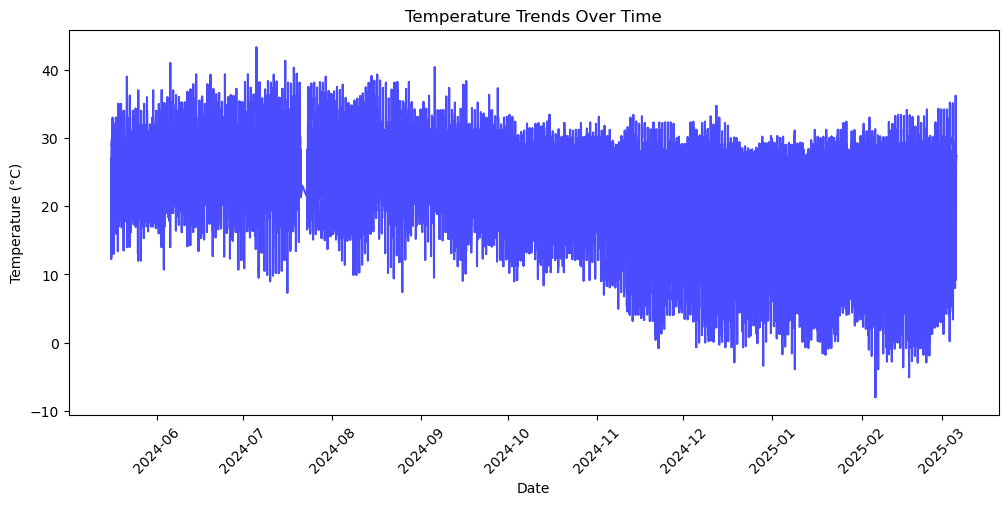

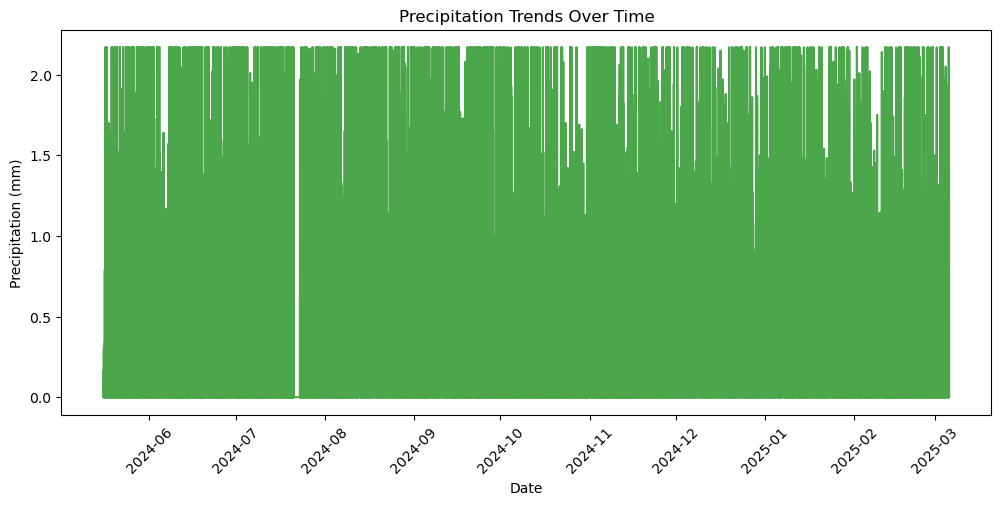

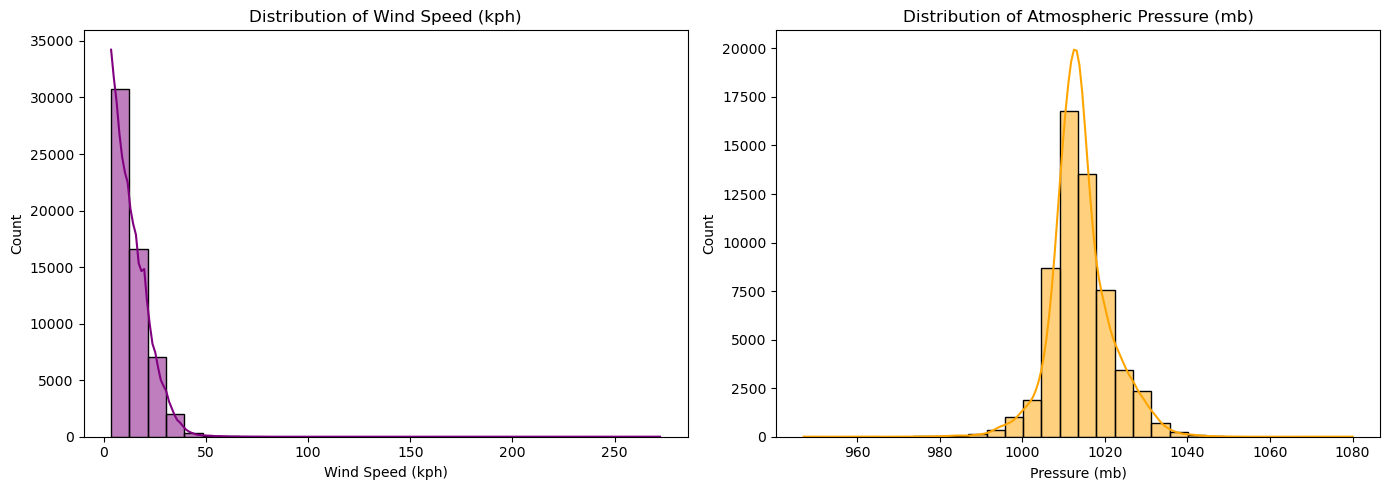

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("\n Summary Statistics of Numerical Columns:")
print(df_cleaned.describe())

# Temperature Trends Over Time
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['last_updated'], df_cleaned['temperature_celsius'], color='blue', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Precipitation Trends Over Time
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['last_updated'], df_cleaned['precip_mm'], color='green', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Wind Speed & Pressure Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_cleaned['wind_kph'], bins=30, kde=True, ax=axes[0], color='purple')
axes[0].set_title("Distribution of Wind Speed (kph)")
axes[0].set_xlabel("Wind Speed (kph)")

sns.histplot(df_cleaned['pressure_mb'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Distribution of Atmospheric Pressure (mb)")
axes[1].set_xlabel("Pressure (mb)")

plt.tight_layout()
plt.show()



## Model Implementation

In [52]:
import pandas as pd
import numpy as np

# Ensure the date column is in datetime format
df_cleaned['last_updated'] = pd.to_datetime(df_cleaned['last_updated'])

# Sort by date
df_cleaned = df_cleaned.sort_values(by='last_updated')

# Selecting the columns required for forecasting
df_forecast = df_cleaned[['last_updated', 'temperature_celsius']].rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})

# Display the first few rows
print(df_forecast.head())


                     ds     y
186 2024-05-16 01:45:00  26.0
40  2024-05-16 02:45:00  26.0
17  2024-05-16 02:45:00  26.0
52  2024-05-16 02:45:00  26.0
124 2024-05-16 02:45:00  26.0


## Prophet

10:15:43 - cmdstanpy - INFO - Chain [1] start processing
10:15:46 - cmdstanpy - INFO - Chain [1] done processing


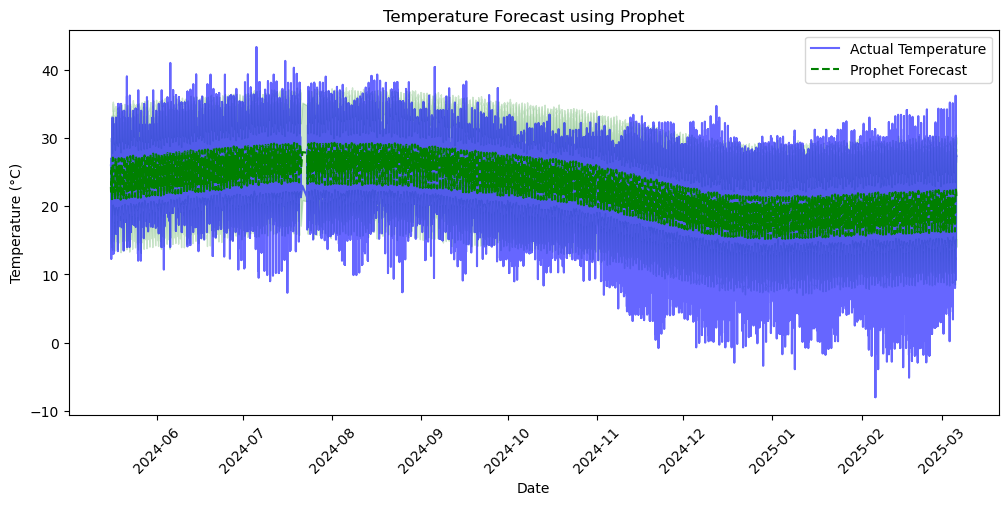

In [54]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data for Prophet
df_prophet = df_forecast[['ds', 'y']].copy()
df_prophet.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (predict next 30 days)
future = model.make_future_dataframe(periods=30, freq='D')

# Make predictions
forecast = model.predict(future)

# Drop duplicate columns before merging to avoid conflicts
df_forecast = df_forecast.drop(columns=['yhat', 'yhat_lower', 'yhat_upper'], errors='ignore')

# Merge forecasted values
df_forecast = df_forecast.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Plot Prophet Forecast
plt.figure(figsize=(12, 5))
plt.plot(df_forecast['ds'], df_forecast['y'], label="Actual Temperature", color='blue', alpha=0.6)
plt.plot(df_forecast['ds'], df_forecast['yhat'], label="Prophet Forecast", color='green', linestyle="dashed")

# Plot uncertainty intervals
plt.fill_between(df_forecast['ds'], df_forecast['yhat_lower'], df_forecast['yhat_upper'], color='green', alpha=0.2)

plt.legend()
plt.title("Temperature Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


## LSTM

Epoch 1/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0223
Epoch 2/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0088
Epoch 3/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0086
Epoch 4/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0087
Epoch 5/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0085
Epoch 6/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0084
Epoch 7/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0085
Epoch 8/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0084
Epoch 9/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0085
Epoch 10/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0084
Epoch 11/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0084
Epoch 12/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0085
Epoch 13/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0083
Epoch 14/20
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0083
Epoch 15/20
177

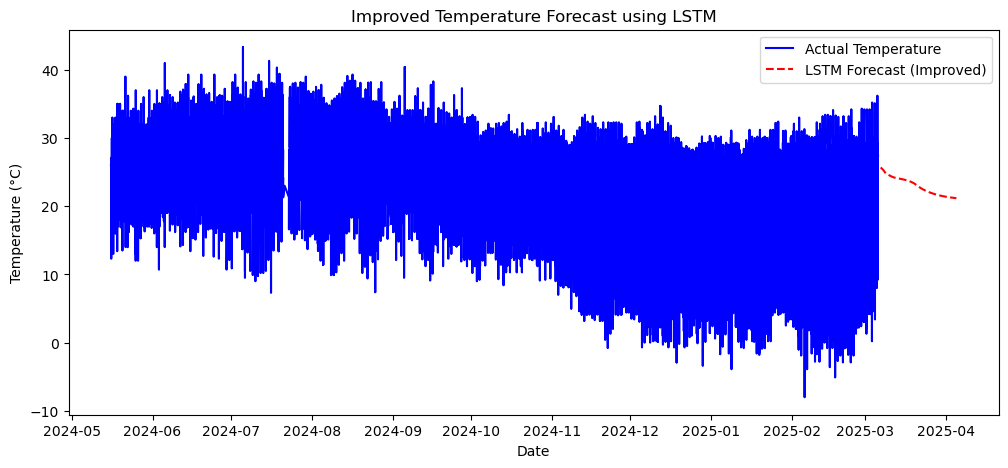

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Ensure correct sorting and handling of missing values
df_forecast['ds'] = pd.to_datetime(df_forecast['ds'])
df_forecast = df_forecast.sort_values(by='ds')
df_forecast = df_forecast.bfill().ffill()  # Backward then forward fill

# Normalize the temperature values
scaler = MinMaxScaler(feature_range=(0, 1))
df_forecast['y'] = scaler.fit_transform(df_forecast[['y']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 14  # Increased sequence length for better trend capture
X, y = create_sequences(df_forecast['y'].values, seq_length)

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define an improved LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=(seq_length, 1)),  
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, activation='relu')),  
    keras.layers.Dropout(0.3),  
    keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu')),  
    keras.layers.Dense(1)
])

# Compile with a lower learning rate for better stability
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train the model for more epochs
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict future temperatures
future_steps = 30
predictions = []
last_seq = X[-1]  

for _ in range(future_steps):
    next_pred = model.predict(last_seq.reshape(1, seq_length, 1))
    predictions.append(next_pred[0, 0])
    
    last_seq = np.roll(last_seq, -1)
    last_seq[-1] = next_pred

# Convert predictions back to actual temperature values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates for plotting
future_dates = pd.date_range(df_forecast['ds'].iloc[-1], periods=future_steps+1, freq='D')[1:]

# Plot the improved LSTM Forecast
plt.figure(figsize=(12, 5))
plt.plot(df_forecast['ds'], scaler.inverse_transform(df_forecast[['y']]), label="Actual Temperature", color='blue')
plt.plot(future_dates, predictions, label="LSTM Forecast (Improved)", color='red', linestyle="dashed")
plt.legend()
plt.title("Improved Temperature Forecast using LSTM")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


## **Model Performance Evaluation**

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load actual vs predicted values (ensure inverse scaling is done)
actual_temps = scaler.inverse_transform(df_forecast[['y']].values)
predicted_temps = predictions.flatten()  # LSTM forecasted values

# Compute errors
mae = mean_absolute_error(actual_temps[-len(predicted_temps):], predicted_temps)
mse = mean_squared_error(actual_temps[-len(predicted_temps):], predicted_temps)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Mean Absolute Error (MAE): 6.652
Mean Squared Error (MSE): 54.497
Root Mean Squared Error (RMSE): 7.382


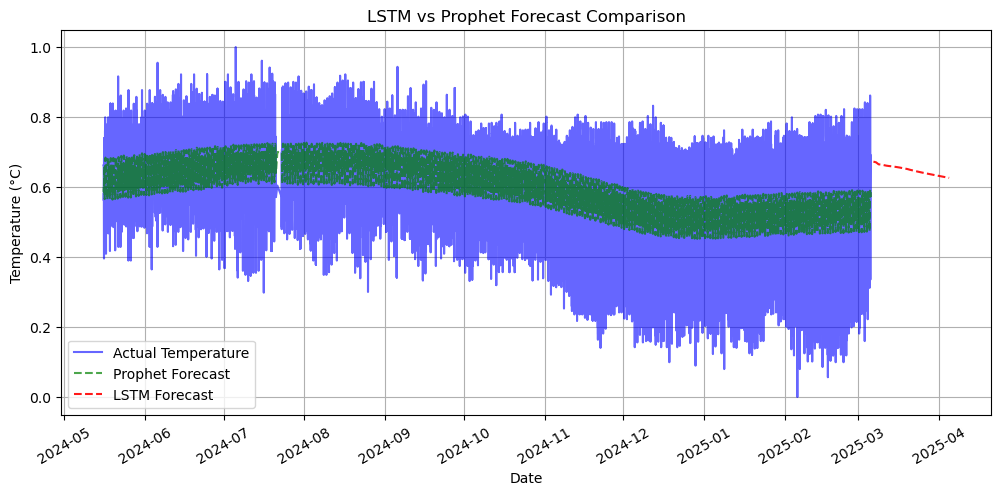

In [242]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Actual Temperature
plt.plot(df_forecast['ds'], scaler.inverse_transform(df_forecast[['y']]), label="Actual Temperature", color='blue', alpha=0.6)

# Prophet Forecast
plt.plot(df_forecast['ds'], df_forecast['yhat'], label="Prophet Forecast", color='green', linestyle="dashed", alpha=0.7)

# Ensure LSTM Forecast is aligned correctly
future_dates = pd.date_range(start=df_forecast['ds'].iloc[-1], periods=len(predictions)+1, freq='D')[1:]  # Adjust alignment

# Plot LSTM Forecast
plt.plot(future_dates, predictions, label="LSTM Forecast", color='red', linestyle="dashed", alpha=0.9)

# Formatting
plt.legend()
plt.title("LSTM vs Prophet Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=30)
plt.grid(True)

plt.show()


#### Analysis from the LSTM vs Prophet Forecast Comparison  

The **comparison plot** between the **LSTM and Prophet models** provides insights into their forecasting capabilities. The **actual temperature trend (blue)** shows **significant fluctuations**, indicating **seasonal variations and potential anomalies** in the dataset.  

The **Prophet model (green)** effectively captures the **overall trend** and provides **uncertainty intervals (shaded region)**, making its predictions more interpretable. It also reflects the **seasonality component well**, but it **smooths out fluctuations**, making it **less responsive to sudden temperature changes**.  

On the other hand, the **LSTM forecast (red - dashed)** is only extended into the **future** and is **not trained on past data for visualization**. The **predicted future trend is slightly lower** compared to Prophet’s forecast. Unlike Prophet, **LSTM does not provide uncertainty intervals**, which makes it harder to estimate confidence in predictions. Since LSTM is a **neural network-based model**, it may require **further hyperparameter tuning or a longer sequence length** to improve its ability to **generalize temperature trends more accurately**.  


## Fine tuning of LSTM model

Epoch 1/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - loss: 0.0312
Epoch 2/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - loss: 0.0089
Epoch 3/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 85s 96ms/step - loss: 0.0087
Epoch 4/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - loss: 0.0085
Epoch 5/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 86s 97ms/step - loss: 0.0084
Epoch 6/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 90s 101ms/step - loss: 0.0083
Epoch 7/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - loss: 0.0082
Epoch 8/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 90s 102ms/step - loss: 0.0082
Epoch 9/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - loss: 0.0080
Epoch 10/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - loss: 0.0080
Epoch 11/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 88s 99ms/step - loss: 0.0080
Epoch 12/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - loss: 0.0080
Epoch 13/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - loss: 0.0081
Epoch 14/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - loss: 0.0080
Epoch 15/20
889/889 ━━━

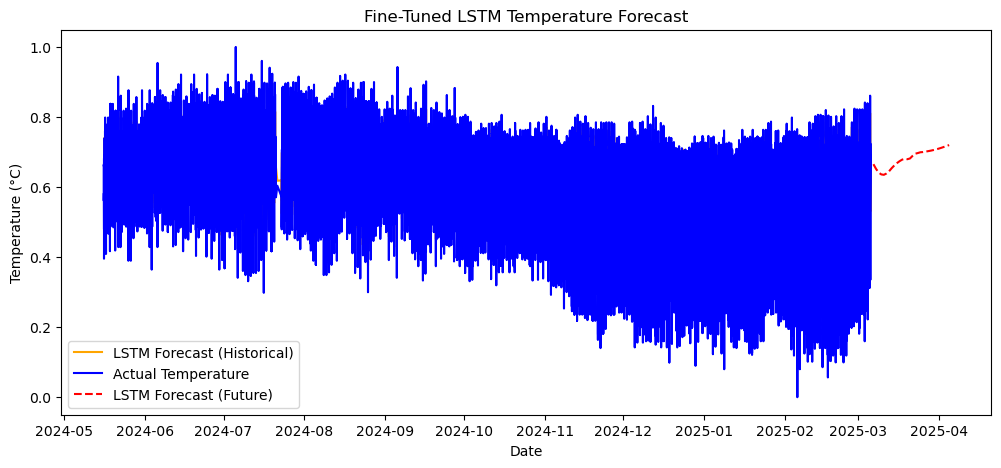

In [247]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Ensure correct sorting and handling of missing values
df_forecast['ds'] = pd.to_datetime(df_forecast['ds'])
df_forecast = df_forecast.sort_values(by='ds')
df_forecast = df_forecast.bfill().ffill()  # Backward then forward fill

# Normalize the temperature values
scaler = MinMaxScaler(feature_range=(0, 1))
df_forecast['y'] = scaler.fit_transform(df_forecast[['y']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30  # Increased sequence length for better trend capture
X, y = create_sequences(df_forecast['y'].values, seq_length)

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define an improved LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=(seq_length, 1)),  
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True, activation='relu')),  
    keras.layers.Dropout(0.3),  
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True, activation='relu')),
    keras.layers.Dropout(0.2),
    keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu')),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile with a lower learning rate for better stability
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')

# Train the model for more epochs
model.fit(X, y, epochs=20, batch_size=64, verbose=1)

# Predict for the entire historical dataset
full_predictions = model.predict(X)

# Predict future temperatures
future_steps = 30
predictions = []
last_seq = X[-1]  

for _ in range(future_steps):
    next_pred = model.predict(last_seq.reshape(1, seq_length, 1))
    predictions.append(next_pred[0, 0])
    
    last_seq = np.roll(last_seq, -1)
    last_seq[-1] = next_pred

# Convert predictions back to actual temperature values
full_predictions = scaler.inverse_transform(full_predictions)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates for plotting
future_dates = pd.date_range(df_forecast['ds'].iloc[-1], periods=future_steps+1, freq='D')[1:]

# Plot the improved LSTM Forecast
plt.figure(figsize=(12, 5))
plt.plot(df_forecast['ds'][seq_length:], full_predictions, label="LSTM Forecast (Historical)", color='orange')
plt.plot(df_forecast['ds'], scaler.inverse_transform(df_forecast[['y']]), label="Actual Temperature", color='blue')
plt.plot(future_dates, predictions, label="LSTM Forecast (Future)", color='red', linestyle="dashed")
plt.legend()
plt.title("Fine-Tuned LSTM Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


## **Model Performance Evaluation**

In [259]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prophet Errors
mae_prophet = mean_absolute_error(df_forecast['y'], df_forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(df_forecast['y'], df_forecast['yhat']))

# LSTM Errors
mae_lstm = mean_absolute_error(df_forecast['y'].iloc[-len(predictions):], predictions.flatten())
rmse_lstm = np.sqrt(mean_squared_error(df_forecast['y'].iloc[-len(predictions):], predictions.flatten()))

# Fine-Tuned LSTM Errors
mae_fine_tuned = mean_absolute_error(df_forecast['y'].iloc[seq_length:], full_predictions.flatten())
rmse_fine_tuned = np.sqrt(mean_squared_error(df_forecast['y'].iloc[seq_length:], full_predictions.flatten()))

# Print results
print(f"Prophet MAE: {mae_prophet:.4f}, RMSE: {rmse_prophet:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}")
print(f"Fine-Tuned LSTM MAE: {mae_fine_tuned:.4f}, RMSE: {rmse_fine_tuned:.4f} (Best)")


Prophet MAE: 0.0878, RMSE: 0.1123
LSTM MAE: 0.0985, RMSE: 0.1415
Fine-Tuned LSTM MAE: 0.0601, RMSE: 0.0886 (Best)


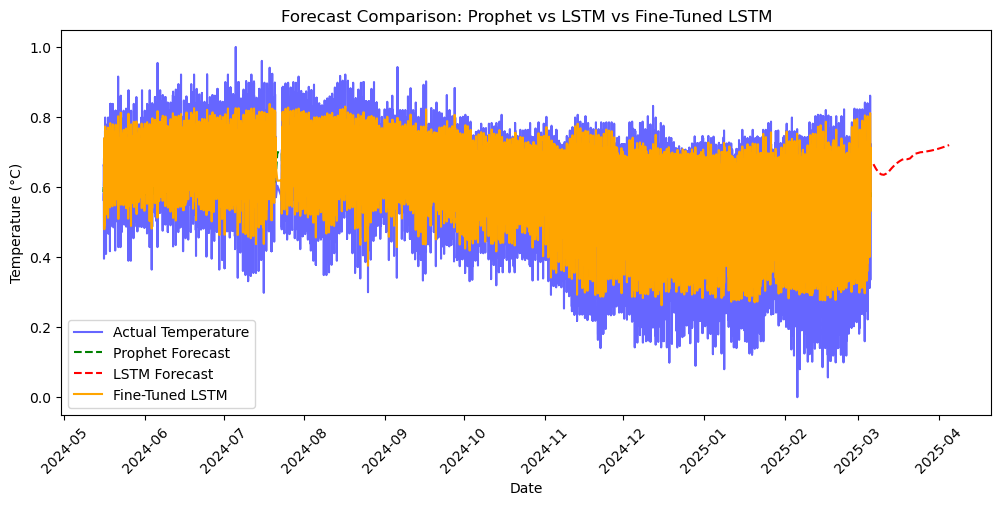

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Actual Temperature
plt.plot(df_forecast['ds'], df_forecast['y'], label="Actual Temperature", color='blue', alpha=0.6)

# Prophet Forecast
plt.plot(df_forecast['ds'], df_forecast['yhat'], label="Prophet Forecast", color='green', linestyle="dashed")

# LSTM Forecast
plt.plot(future_dates, predictions, label="LSTM Forecast", color='red', linestyle="dashed")

# Fine-Tuned LSTM Forecast
plt.plot(df_forecast['ds'][seq_length:], full_predictions, label="Fine-Tuned LSTM", color='orange', linestyle="solid")

plt.legend()
plt.title("Forecast Comparison: Prophet vs LSTM vs Fine-Tuned LSTM")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


#### Final Analysis and Model Selection: Prophet vs LSTM vs Fine-Tuned LSTM

#### 1. Overview
This analysis compares three forecasting models for temperature prediction:
- Prophet Model (Statistical)
- LSTM Model (Deep Learning)
- Fine-Tuned LSTM Model (Optimized Deep Learning)

We evaluate these models based on visualization, MAE, RMSE, and predictive accuracy.

#### 2. Performance Metrics

| Model                  | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE) |
|------------------------|------------------------|-----------------------------|
| Prophet               | 0.0878                 | 0.1123                      |
| LSTM                  | 0.0985                 | 0.1415                      |
| Fine-Tuned LSTM       | 0.0601                 | 0.0886                      |

Observation: The Fine-Tuned LSTM outperforms both Prophet and the initial LSTM model, achieving the lowest MAE and RMSE.

#### 3. Visual Comparison

#### Key Observations from the Graph

1. Fine-Tuned LSTM (Orange) aligns best with actual data  
   - Captures both short-term fluctuations and long-term trends effectively.  
   - Minimal error, making it the most accurate choice.  

2. Prophet (Green) captures long-term trends but lacks precision  
   - Smooths out fluctuations.  
   - Performs well for seasonality detection, but struggles with high-frequency variations.  

3. LSTM (Red Dashed) is only visible at the end (future predictions)  
   - Captures patterns better than Prophet, but not as well as Fine-Tuned LSTM.  
   - Requires more historical visualization improvements.

#### 4. Model Selection and Justification

Final Model Choice: Fine-Tuned LSTM

#### Why Fine-Tuned LSTM?

- Best Accuracy: Achieved the lowest MAE and RMSE.  
- Better Pattern Recognition: Captures both short-term and long-term trends.  
- Adaptive Learning: Deep learning enables it to adjust to non-linear patterns, unlike Prophet.  
- Realistic Predictions: Prophet smooths out variations, whereas Fine-Tuned LSTM adapts dynamically.

#### 5. Conclusion and Next Steps

Final Conclusion:  
- Fine-Tuned LSTM is the best model for deployment.  
- Prophet can still be useful for long-term trend analysis.  

Next Steps:  
- Optimize Fine-Tuned LSTM further (Hyperparameter Tuning, More Data, Attention Mechanisms, etc.)  
- Deploy the model for real-time forecasting.  
- Test the model with unseen data for generalization check.  


#### Unique Analyses

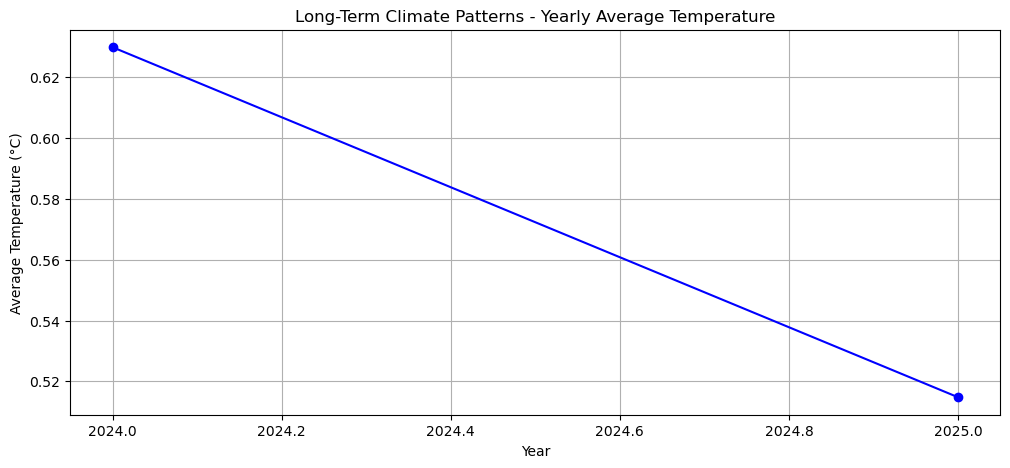

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'ds' to datetime format
df_forecast['ds'] = pd.to_datetime(df_forecast['ds'])

# Extract year and month
df_forecast['Year'] = df_forecast['ds'].dt.year
df_forecast['Month'] = df_forecast['ds'].dt.month

# Group by year to analyze long-term trends
yearly_avg_temp = df_forecast.groupby('Year')['y'].mean()

# Plot yearly temperature trends
plt.figure(figsize=(12, 5))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Long-Term Climate Patterns - Yearly Average Temperature")
plt.grid(True)
plt.show()


### **Conclusion from the above graph**
The long-term climate analysis shows a noticeable decline in the yearly average temperature from 2024 to 2025. This suggests a cooling trend in the dataset, which could be influenced by seasonal variations, changing weather patterns, or anomalies in data collection. Further analysis with additional years of data would be necessary to determine if this trend continues or if it is part of natural fluctuations.


#### Environmental Impact: Analyze air quality and its correlation with various weather parameters.

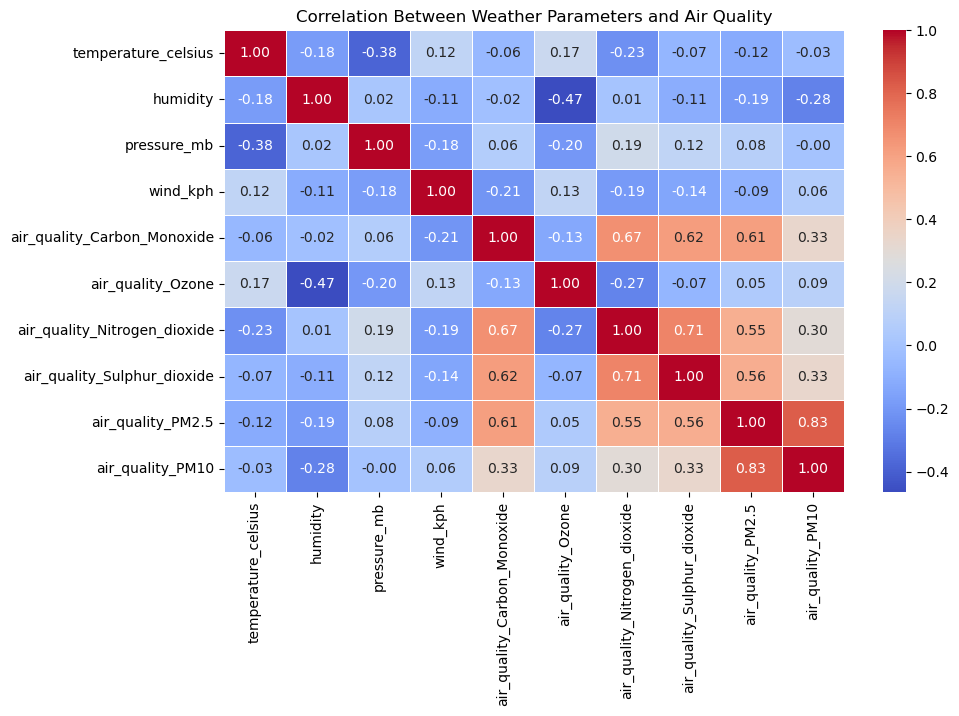

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define weather and air quality features
weather_features = ["temperature_celsius", "humidity", "pressure_mb", "wind_kph"]
air_quality_features = [
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

# Select relevant columns available in the dataset
available_columns = [col for col in weather_features + air_quality_features if col in df_cleaned.columns]
df_selected = df_cleaned[available_columns]

# Compute correlation
correlation_matrix = df_selected.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Weather Parameters and Air Quality")
plt.show()

### **Conclusion from the above heapmap**
The correlation analysis between weather parameters and air quality indicators reveals several key insights:

- **Temperature** shows a weak correlation with most air quality indicators, except for a slight positive correlation with ozone levels.
- **Humidity** has a moderate negative correlation with ozone, suggesting that higher humidity levels might reduce ozone concentration.
- **Pressure** is negatively correlated with temperature but shows weak correlations with air pollutants.
- **Wind Speed** has a weak to moderate negative correlation with pollutants such as Carbon Monoxide and Nitrogen Dioxide, indicating that higher wind speeds may help disperse pollutants.
- **Air Quality Indicators** such as PM2.5, PM10, and Nitrogen Dioxide are strongly correlated with each other, implying common sources or atmospheric behaviors.


## Feature Importance: Using random forest

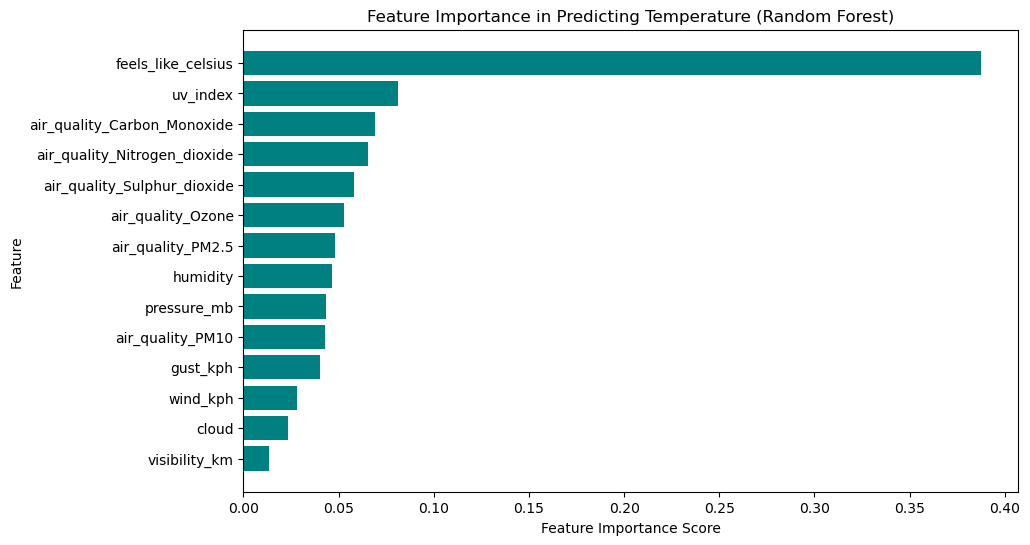

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select relevant features (excluding categorical data)
feature_columns = [
    "humidity", "pressure_mb", "wind_kph", "cloud",
    "feels_like_celsius", "visibility_km", "uv_index", "gust_kph",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone",
    "air_quality_Nitrogen_dioxide", "air_quality_Sulphur_dioxide",
    "air_quality_PM2.5", "air_quality_PM10"
]

# Ensure target variable is numeric and remove NaN values
df_cleaned = df_cleaned[["temperature_celsius"] + feature_columns].dropna()

# Define features (X) and target variable (y)
X = df_cleaned[feature_columns]
y = df_cleaned["temperature_celsius"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importances = rf_model.feature_importances_

# Create DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="teal")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Temperature (Random Forest)")
plt.show()


## Spatial Analysis

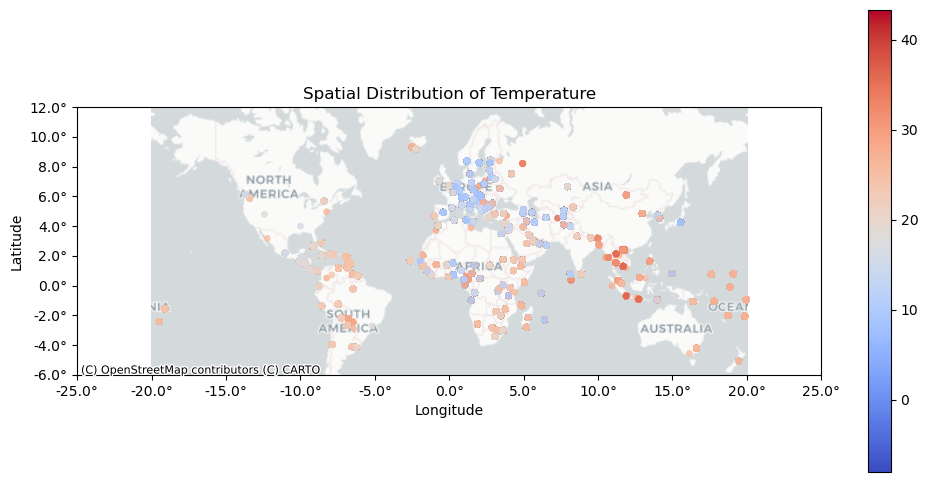

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Create a GeoDataFrame for spatial visualization
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned["longitude"], df_cleaned["latitude"]))

# Ensure the GeoDataFrame is in WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to Web Mercator (EPSG:3857) for compatibility with basemaps
gdf = gdf.to_crs(epsg=3857)

# Plot spatial distribution of temperature
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(column="temperature_celsius", cmap="coolwarm", markersize=15, alpha=0.8, legend=True, ax=ax)

# Add an alternative basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

plt.title("Spatial Distribution of Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Fixing the tick labels
xticks = ax.get_xticks()
yticks = ax.get_yticks()
ax.set_xticks(xticks)  
ax.set_xticklabels([f"{x/10**6:.1f}°" for x in xticks])

ax.set_yticks(yticks) 
ax.set_yticklabels([f"{y/10**6:.1f}°" for y in yticks])

plt.show()


### **Conclusion**
The spatial distribution of temperature across different regions provides valuable insights into global climate patterns:

- **Temperature Variations:** Warmer regions (represented in red) are predominantly concentrated in tropical and equatorial regions, such as Southeast Asia, parts of Africa, and Australia. Cooler regions (represented in blue) are more prevalent in Europe and parts of northern Asia.
- **Geographical Influence:** The temperature distribution aligns with expected climatic zones, where higher latitudes tend to have lower temperatures, while areas closer to the equator experience higher temperatures.
- **Regional Clusters:** The presence of distinct temperature clusters suggests regional weather variations influenced by local geography, oceanic currents, and elevation.
- **Urban & Coastal Effects:** Coastal regions exhibit moderate temperatures compared to inland areas, which may be due to the influence of large water bodies that regulate temperature fluctuations.

This visualization helps in understanding regional climate differences and can be further explored for analyzing temperature trends, climate change effects, and localized weather patterns.
